
Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

print daily_engagement[1]
print project_submissions[1]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'2.0', u'total_minutes_visited': u'37.2848873333', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-10'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'INCOMPLETE', u'completion_date': u'2015-01-13', u'creation_date': u'2015-01-10'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

student_list_project_submissions = []
for student in project_submissions:
    if student["account_key"] not in student_list_project_submissions:
        student_list_project_submissions.append(student["account_key"])
        
unique_students_project_submissions = int(len(student_list_project_submissions))
number_of_rows_project_submissions = int(len(project_submissions))

student_list_daily_engagement = []
for student in daily_engagement:
    if student["acct"] not in student_list_daily_engagement:
        student_list_daily_engagement.append(student["acct"])
        
unique_students_daily_engagement = int(len(student_list_daily_engagement))
number_of_rows_daily_engagement = int(len(daily_engagement))

student_list_enrollments = []


for student in enrollments:
    if student["account_key"] not in student_list_enrollments:
        student_list_enrollments.append(student["account_key"])

unique_students_enrollments = int(len(student_list_enrollments))
number_of_rows_enrollments = int(len(student_list_enrollments))

print unique_students_project_submissions
print number_of_rows_project_submissions
print unique_students_daily_engagement
print number_of_rows_daily_engagement
print unique_students_enrollments
print number_of_rows_enrollments
    


743
3642
1237
136240
1302
1302


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
engagement = daily_engagement
engagement_list = []
for engagement in daily_engagement:
    if engagement["acct"]:
        engagement["account_key"] = engagement.pop("acct")
    engagement_list.append(engagement)

daily_engagement = engagement_list
print len(daily_engagement)



136240


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
weird_students = []
counter = 0 
for enrollment in enrollments:
    if enrollment['days_to_cancel'] != 0:
        if enrollment['account_key'] not in student_list_daily_engagement:
            counter = counter + 1
            weird_students.append(enrollment)

            
print counter
print weird_students

3
[{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}, {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}, {u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}]


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
print non_udacity_enrollments[1]
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None:
        if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:
            paid_students[enrollment['account_key']] = enrollment['join_date']
    elif enrollment['days_to_cancel'] > 7:
        if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:
            paid_students[enrollment['account_key']] = enrollment['join_date']
    else:
        pass
    
print len(paid_students)
print paid_students['1']

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'429', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 120}
995
2015-05-06 00:00:00


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []
print non_udacity_engagement[0]
for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students:
        if within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
            paid_engagement_in_first_week.append(engagement)
            
print len(paid_engagement_in_first_week)
        
        
    
    

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
6919


## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.


## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons
    
import numpy as np

total_lessons = total_lessons_by_account.values()
print 'Mean:', np.mean(total_lessons)
print 'Standard deviation:', np.std(total_lessons)
print 'Minimum', np.min(total_lessons)
print 'Maximum', np.max(total_lessons)



Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum 0
Maximum 36


## Number of Visits in First Week

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
from collections import defaultdict


total_visited_by_account = {}
dates_visited_by_student = defaultdict(list)
for account_key, engagement_for_student in engagement_by_account.items():
    total_visits = 0
    for engagement_record in engagement_for_student:
        if engagement_record['utc_date'] not in dates_visited_by_student[engagement_record['account_key']]:
            if engagement_record['num_courses_visited'] > 0:
                dates_visited_by_student[engagement_record['account_key']].append(engagement_record['utc_date'])
        #total_visits += engagement_record['num_courses_visited']
    total_visited_by_account[account_key] = len(dates_visited_by_student[account_key])
    
import numpy as np
total_visits = total_visited_by_account.values()
print 'Mean:', np.mean(total_visits)
print 'Standard deviation:', np.std(total_visits)
print 'Minimum:', np.min(total_visits)
print 'Maximum:', np.max(total_visits)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [27]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#print paid_students['1']
#print non_udacity_submissions[1]
paid_submissions = []


subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement = []
non_passing_engagement = []
account_key_list = []
passing_keys = []


for key in paid_students:
    for submission in non_udacity_submissions:
        if submission['account_key'] == key and \
        key not in account_key_list:
            paid_submissions.append(submission)
            account_key_list.append(key)
            
    


#for student in paid_engagement_in_first_week:
#    if student['account_key'] not in account_key_list:
#        account_key_list.append(student['account_key'])

#print non_udacity_submissions[1]
for submission in non_udacity_submissions:
    if submission['account_key'] in account_key_list:
        if submission['lesson_key'] in subway_project_lesson_keys:
            if submission['assigned_rating'] == 'PASSED' or \
            submission['assigned_rating'] == 'DISTINCTION':
                passing_engagement.append(submission)
                passing_keys.append(submission['account_key'])
        else:
            if submission['account_key'] not in passing_keys:
                non_passing_engagement.append(submission)

print passing_engagement[0]
passing_keys = []

for submission in passing_engagement:
    if submission['account_key'] not in passing_keys:
        passing_keys.append(submission['account_key'])

passing_engagement = []
non_passing_engagement = []


for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in passing_keys:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)
print len(account_key_list)
print len(paid_submissions)
print len(non_udacity_submissions)
            
print passing_engagement[0]

#passing_engagement
#non_passing_engagement

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'PASSED', u'completion_date': datetime.datetime(2015, 1, 20, 0, 0), u'creation_date': datetime.datetime(2015, 1, 20, 0, 0)}
4527
2392
731
731
3634
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Comparing the Two Student Groups

In [62]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


from collections import defaultdict

minutes_passing_by_account = defaultdict(list)
minutes_non_passing_by_account = defaultdict(list)
lessons_passing_by_account = defaultdict(list)
lessons_non_passing_by_account = defaultdict(list)
days_passing_by_account = defaultdict(list)
days_non_passing_by_account = defaultdict(list)


for engagement in passing_engagement:
    key = engagement['account_key']
    minutes_passing_by_account[key].append(engagement['total_minutes_visited'])
    lessons_passing_by_account[key].append(engagement['lessons_completed'])
        
for engagement in non_passing_engagement:
    key = engagement['account_key']
    minutes_non_passing_by_account[key].append(engagement['total_minutes_visited'])
    lessons_non_passing_by_account[key].append(engagement['lessons_completed'])
    

    
passing_minutes = []    
non_passing_minutes = []
minute_counter = 0

for account_key in minutes_passing_by_account.keys():
    for minute in minutes_passing_by_account[account_key]:
        minute_counter += minute
    passing_minutes.append(minute_counter)
    minute_counter = 0
    
for account_key in minutes_non_passing_by_account.keys():
    for minute in minutes_non_passing_by_account[account_key]:
        minute_counter += minute
    non_passing_minutes.append(minute_counter)
    minute_counter = 0

passing_lessons = []
non_passing_lessons = []
lesson_counter = 0

for account_key in lessons_passing_by_account.keys():
    for lesson in lessons_passing_by_account[account_key]:
        lesson_counter += lesson
    passing_lessons.append(lesson_counter)
    lesson_counter = 0
    
for account_key in lessons_non_passing_by_account.keys():
    for lesson in lessons_non_passing_by_account[account_key]:
        lesson_counter += lesson
    non_passing_lessons.append(lesson_counter)
    lesson_counter = 0

    
import numpy as np

print 'Minutes Passing Mean:', np.mean(passing_minutes)
print 'Minutes Passing Standard deviation:', np.std(passing_minutes)
print 'Minutes Passing Minimum:', np.min(passing_minutes)
print 'Minutes Passing Maximum:', np.max(passing_minutes)
print ""
print 'Minutes Non Passing Mean:', np.mean(non_passing_minutes)
print 'Minutes Non Passing Standard deviation:', np.std(non_passing_minutes)
print 'Minutes Non Passing Minimum:', np.min(non_passing_minutes)
print 'Minutes Non Passing Maximum:', np.max(non_passing_minutes)
print ""
print 'Lessons Passing Mean:', np.mean(passing_lessons)
print 'Lessons Passing Standard deviation:', np.std(passing_lessons)
print 'Lessons Passing Minimum:', np.min(passing_lessons)
print 'Lessons Passing Maximum:', np.max(passing_lessons)
print ""
print 'Lessons Non Passing Mean:', np.mean(non_passing_lessons)
print 'Lessons Non Passing Standard deviation:', np.std(non_passing_lessons)
print 'Lessons Non Passing Minimum:', np.min(non_passing_lessons)
print 'Lessons Non Passing Maximum:', np.max(non_passing_lessons)




Minutes Passing Mean: 394.586046484
Minutes Passing Standard deviation: 448.499519327
Minutes Passing Minimum: 0.0
Minutes Passing Maximum: 3564.7332645

Minutes Non Passing Mean: 143.326474267
Minutes Non Passing Standard deviation: 269.538619011
Minutes Non Passing Minimum: 0.0
Minutes Non Passing Maximum: 1768.52274933

Lessons Passing Mean: 2.05255023184
Lessons Passing Standard deviation: 3.14222705558
Lessons Passing Minimum: 0
Lessons Passing Maximum: 36

Lessons Non Passing Mean: 0.862068965517
Lessons Non Passing Standard deviation: 2.54915994183
Lessons Non Passing Minimum: 0
Lessons Non Passing Maximum: 27


## Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

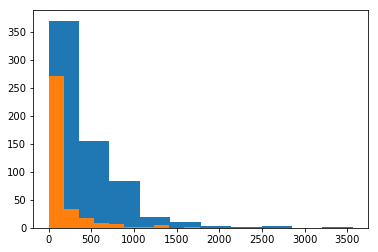

In [73]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_minutes)
plt.hist(non_passing_minutes)




## Improving Plots and Sharing Findings

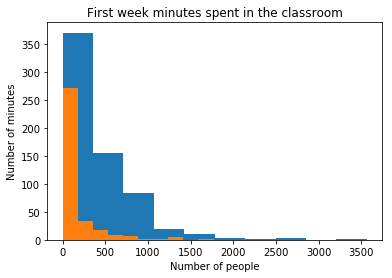

In [74]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns
plt.hist(passing_minutes)
plt.hist(non_passing_minutes)
plt.xlabel("Number of people")
plt.ylabel("Number of minutes")
plt.title("First week minutes spent in the classroom")